# 교차검정, 파생변수 등

- 변수 간의 관계 분석
  - 1) 범주형, 범주형

In [20]:
new_data = read.csv('new_data.csv',header=T)
str(new_data)

'data.frame':	231 obs. of  15 variables:
 $ resident : int  1 2 4 5 3 2 2 5 3 1 ...
 $ gender   : int  1 1 2 1 1 2 1 2 1 1 ...
 $ job      : int  1 2 NA 3 2 1 2 NA 3 1 ...
 $ age      : int  26 54 45 62 57 36 37 29 35 56 ...
 $ position : int  4 1 2 1 NA 3 3 4 4 1 ...
 $ price    : num  5.1 4.2 3.5 5 5.4 4.1 4.9 2.3 4.2 6.7 ...
 $ survey   : int  5 4 4 5 4 2 3 1 3 4 ...
 $ price2   : num  5.1 4.2 3.5 5 5.4 4.1 4.9 2.3 4.2 6.7 ...
 $ price3   : num  5.1 4.2 3.5 5 5.4 4.1 4.9 2.3 4.2 6.7 ...
 $ resident2: chr  "1.서울특별시" "2.인천광역시" "4.대구광역시" "5.시구군" ...
 $ job2     : chr  "공무원" "회사원" NA "개인사업" ...
 $ age2     : chr  "청년층" "중년층" "중년층" "장년층" ...
 $ position2: chr  "4급" "1급" "2급" "1급" ...
 $ gender2  : chr  "남자" "남자" "여자" "남자" ...
 $ age3     : int  1 2 2 3 3 2 2 1 2 3 ...


In [21]:
resident_gender = table(new_data$resident2, new_data$gender2)
resident_gender

              
               남자 여자
  1.서울특별시   67   43
  2.인천광역시   26   20
  3.대전광역시   16   10
  4.대구광역시    6    9
  5.시구군       19   15

In [22]:
gender_resident = table(new_data$gender2, new_data$resident2)
gender_resident

      
       1.서울특별시 2.인천광역시 3.대전광역시 4.대구광역시 5.시구군
  남자           67           26           16            6       19
  여자           43           20           10            9       15

- 성별에 따른 거주지역의 분포 현황 시각화

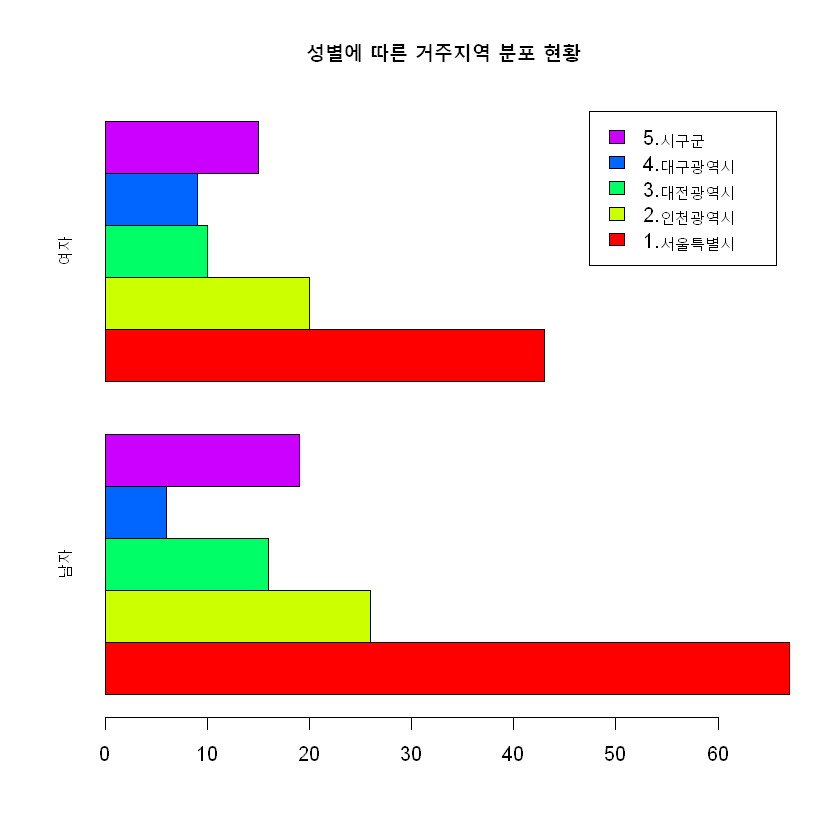

In [23]:
barplot(resident_gender, beside = T, horiz = T, col = rainbow(5),
        legend = row.names(resident_gender), main = '성별에 따른 거주지역 분포 현황')

- 거주지역에 따른 성별의 분포 현황 시각화

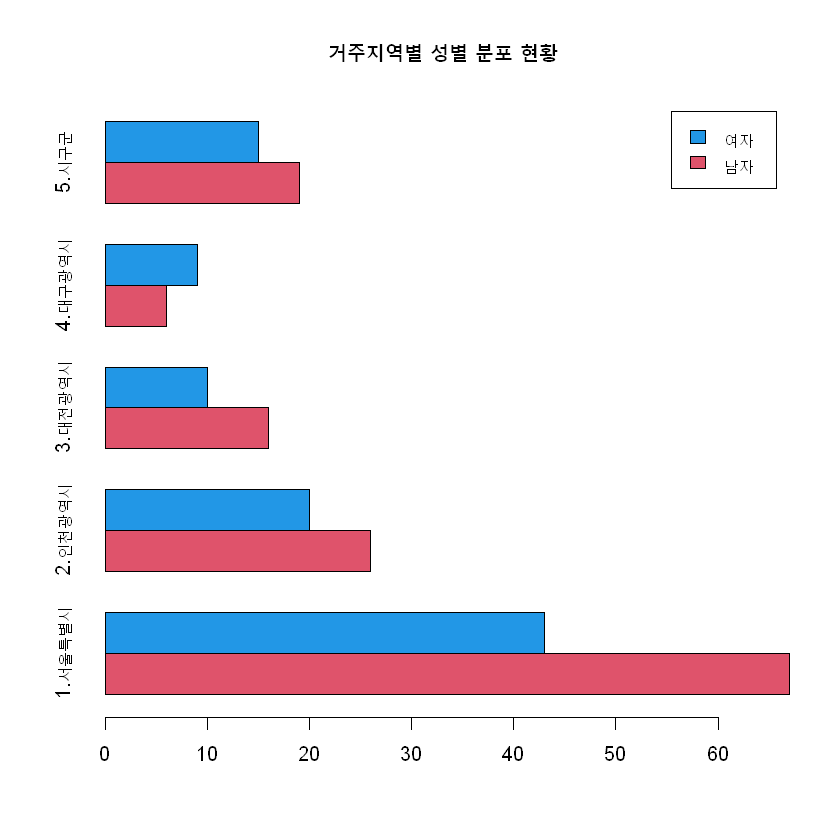

In [24]:
barplot(gender_resident, beside=T, col=rep(c(2,4),5), horiz=T, legend = c('남자','여자'),main = '거주지역별 성별 분포 현황')

- 변수 간의 관계 분석
  - 1) 범주형, 연속형

In [25]:
install.packages('lattice')
library(lattice)

package 'lattice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehfus\AppData\Local\Temp\Rtmp0ckrOG\downloaded_packages


In [33]:
head(new_data)

,resident,gender,job,age,position,price,survey,price2,price3,resident2,job2,age2,position2,gender2,age3
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,1,1,26,4,5.1,5,5.1,5.1,1.서울특별시,공무원,청년층,4급,남자,1
2,2,1,2,54,1,4.2,4,4.2,4.2,2.인천광역시,회사원,중년층,1급,남자,2
3,4,2,NA,45,2,3.5,4,3.5,3.5,4.대구광역시,NA,중년층,2급,여자,2
4,5,1,3,62,1,5.0,5,5.0,5.0,5.시구군,개인사업,장년층,1급,남자,3
5,3,1,2,57,NA,5.4,4,5.4,5.4,3.대전광역시,회사원,장년층,NA,남자,3
6,2,2,1,36,3,4.1,2,4.1,4.1,2.인천광역시,공무원,중년층,3급,여자,2


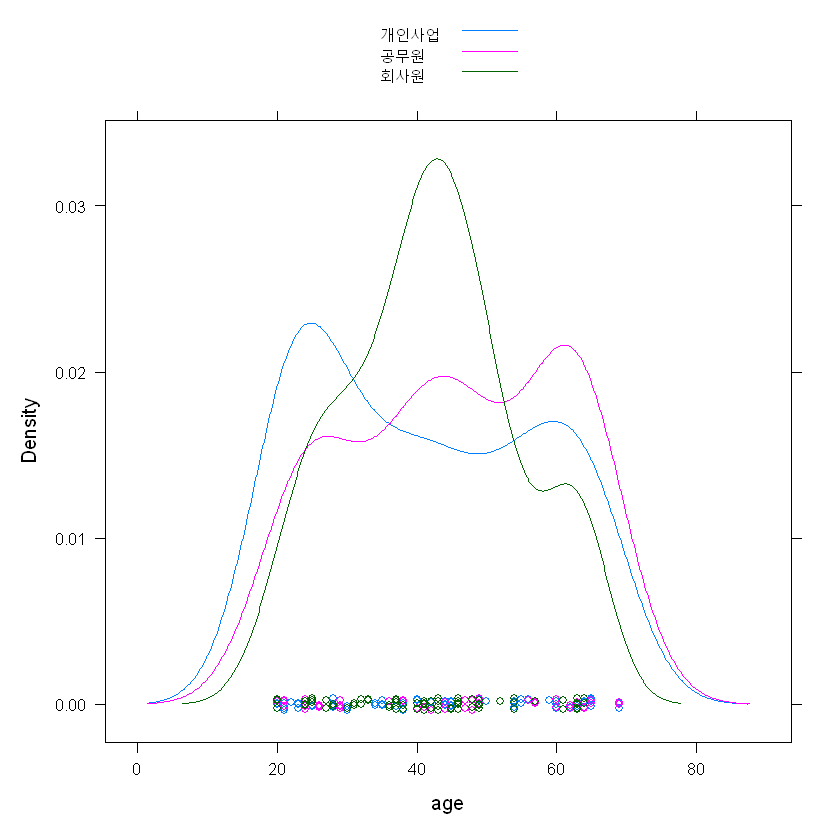

In [36]:
# 직업의 유형에 따라서 나이의 분포를 시각화한 결과이다
densityplot(~age,data=new_data,
           groups = job2,
           # plt.points = T : 밀도, auto.key=T : 범례
           plt.points = T,auto.key=T)

- 연속형, 범주형, 범주형

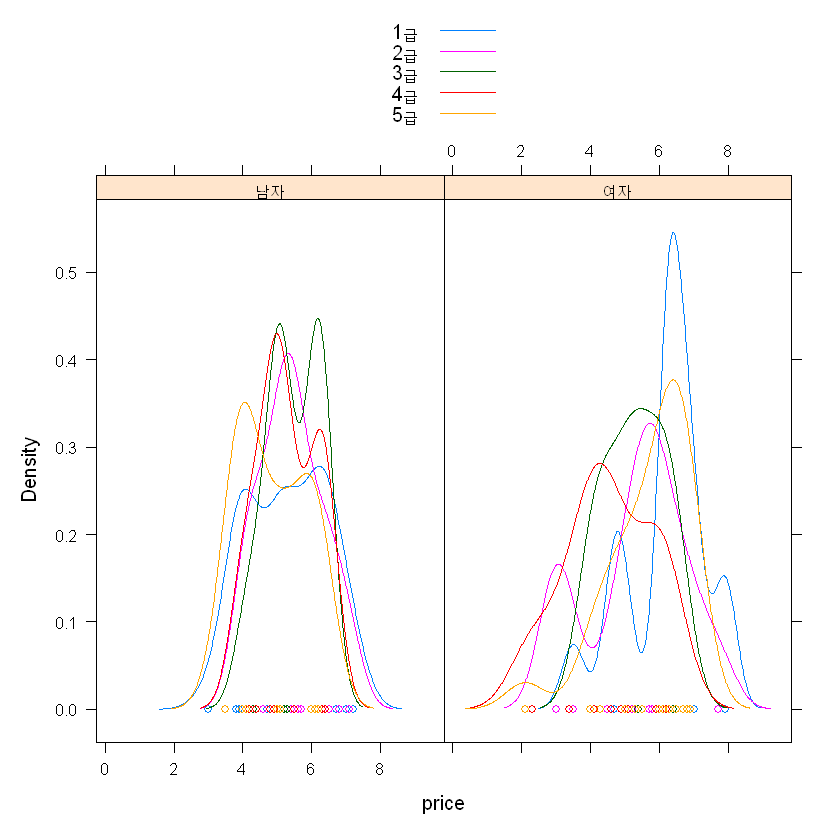

In [41]:
densityplot(~price|factor(gender2), # 격자를 만들어주는 칼럼을 지정하는 속성(성별로 격자 생성)
           data = new_data,
           groups = position2, # 하나의 격자에서 그룹을 지정하는 속성(직급으로 그룹 생성)
           plot.points = T, auto.key=T)

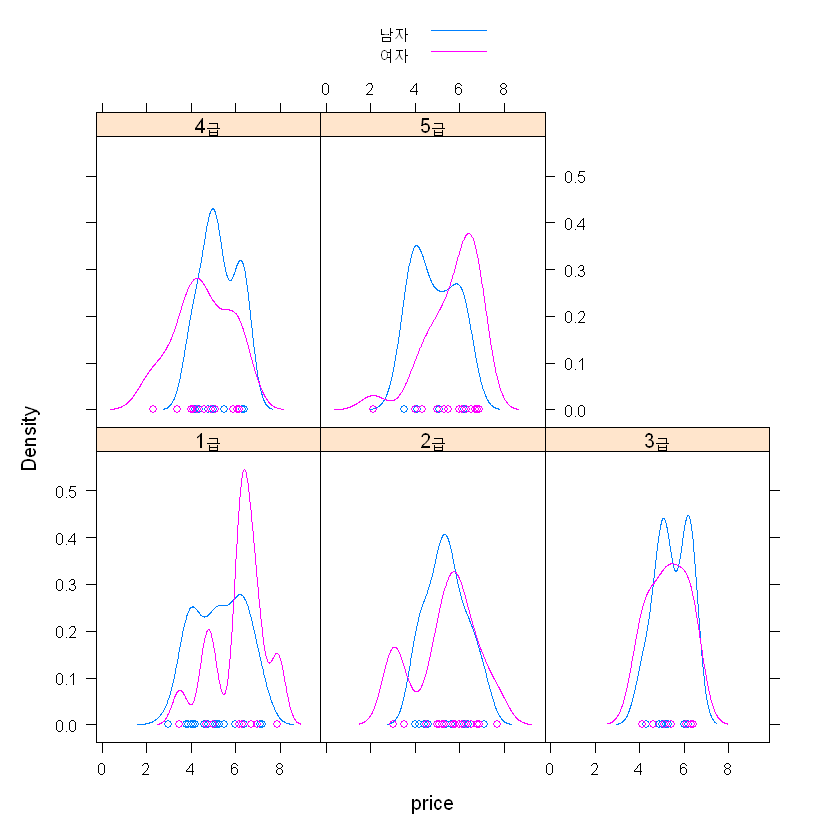

In [42]:
#직급에 따른 성별 구매비용 분석
densityplot(~price|factor(position2),
           data=new_data,
           groups = gender2,
           plot.points=T,auto.key=T)

- 연속형, 연속형, 범주형

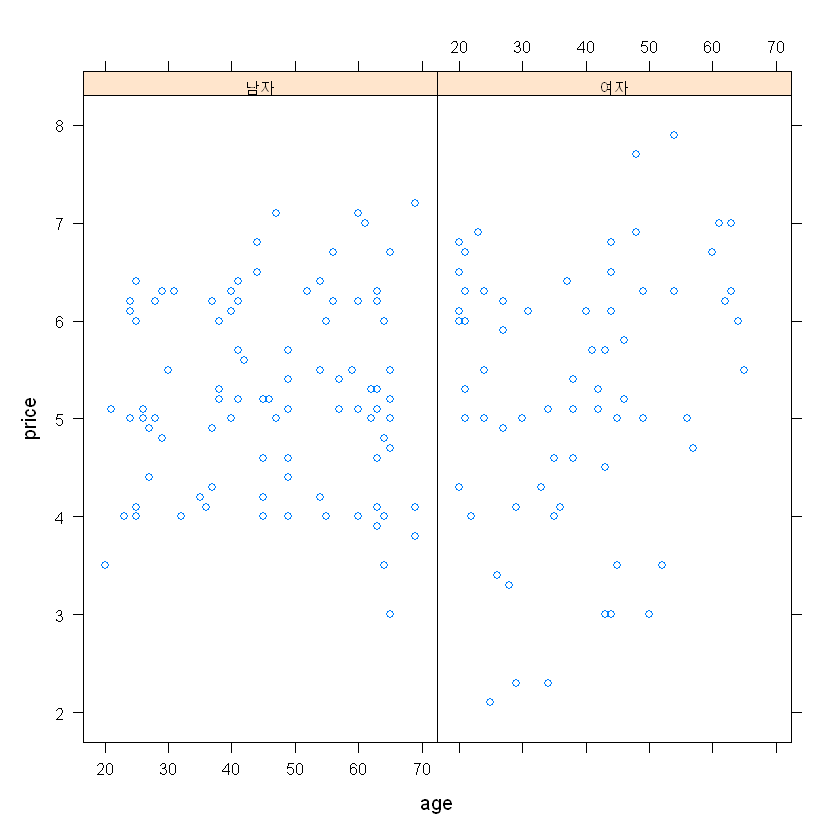

In [44]:
xyplot(price~age | factor(gender2), data= new_data)

---

- 분석을 위해서는 코딩된 데이터를 대상으로 새로운 변수를 생성하여 분석에 이용할 수 있는데, 이렇게 만들어진 변수를 파생변수라고 한다. 즉, 기존 변수를 이용하여 새로 만들어진 변수를 의미한다. 
- 사칙 연산을 이용하는 방법과 1:1 관계로 나열하는 방법이 있다.
  - 사칙 연산을 이용하는 방법은 예로 성적 분포를 나타내는 데이터에서 국어, 영어, 수학 점수를 갖는 칼럼을 대상으로 덧셈 연산이나 나눗셈 연산을 이용하여 총점이나 평균 칼럼을 생성하는 방법이다. 
  - 1:1 관계로 나열하는 것은 원-핫 인코딩을 생각하면 된다. $\to$ 칼럼의 수는 늘어나지만 추론통계분석이나 예측분석에서 설명 변수 즉, 독립 변수로 사용할 수 있다. 

---

- 더미 형식으로 파생변수 생성
  - 특정 칼럼을 명목상 두 가지 상태(0과 1)로 범주화하여 나타내는 형태를 더미라고 표현한다.
  - 여기서는 1:N 관계를 갖는 고객 정보 테이블의 주거환경 칼럼을 대상으로 주택 유형(단독주택과 다세대주택)과 아파트 유형(아파트와 오피스텔)의 두 가지 상태로 더미화 하여 파생변수를 생성하는 과정에 대해서 알아보자

In [46]:
user_data = read.csv('user_data.csv',header=T)
head(user_data)

,user_id,age,house_type,resident,job
,<int>,<int>,<int>,<chr>,<int>
1,1001,35,4,전북,6
2,1002,45,4,경남,2
3,1003,55,4,경기,6
4,1004,43,3,대전,1
5,1005,55,4,경기,2
6,1006,45,1,대구,1


In [48]:
table(user_data$house_type)


  1   2   3   4 
 32  47  21 300 

- 주거환경 오피스텔(4)이 가장 많은 빈도수를 나타낸다.

In [54]:
# 더미변수를 생성해보자
house_type2 = ifelse(user_data$house_type == 1 | user_data$house_type == 2 ,0 ,1 )
house_type2[1:10]
# house_type이 1 또는 2이면 0으로 바꿔주고 아니면 1로 바꿔준다.

[1] 1 1 1 1 1 0 1 0 1 1

In [55]:
# 파생변수 추가
user_data$house_type2 = house_type2 # user_data 데이터셋에 새로운 칼럼을 추가

- 1:N 관계를 1:1 관계로 파생변수 생성

In [56]:
pay_data = read.csv('pay_data.csv',header=T)
head(pay_data)

,user_id,product_type,pay_method,price
,<int>,<int>,<chr>,<dbl>
1,1001,1,1.현금,153000
2,1002,2,2.직불카드,120000
3,1003,3,3.신용카드,780000
4,1003,4,3.신용카드,123000
5,1003,5,3.신용카드,79000
6,1003,1,3.신용카드,125000


In [57]:
table(pay_data$product_type)


  1   2   3   4   5 
 55  82  89 104  70 

- 지불정보 테이블을 대상으로 상품 유형의 빈도수를 나타낸다. 상품 유형은 잡화(4)가 가장 많은 빈도수를 보인다.

In [61]:
# 고객별 상품 유형에 따른 구매금액과 합계를 나타내는 파생변수 생성
library(reshape2) # 구조 변경을 위한 패키지 로딩
product_price = dcast(pay_data, user_id~product_type, sum, na.rm=T) # 행~열
head(product_price)

Using price as value column: use value.var to override.



,user_id,1,2,3,4,5
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,153000,0,0,0,0
2,1002,0,120000,0,0,0
3,1003,125000,0,780000,123000,79000
4,1007,0,150000,78879,81980,71773
5,1011,0,71774,0,0,0
6,1012,0,0,74968,0,0


In [66]:
# 칼럼명 수정
names(product_price) = c('user_id','식료품1','생필품(2)','의류(3)','잡화(4)','기타(5)')
# 확인
head(product_price)

,user_id,식료품1,생필품(2),의류(3),잡화(4),기타(5)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,153000,0,0,0,0
2,1002,0,120000,0,0,0
3,1003,125000,0,780000,123000,79000
4,1007,0,150000,78879,81980,71773
5,1011,0,71774,0,0,0
6,1012,0,0,74968,0,0


---

In [67]:
# 고객별 지불유형에 따른 구매상품 개수를 나타내는 파생변수 생성
pay_price = dcast(pay_data, user_id~pay_method, length)
head(pay_price)

Using price as value column: use value.var to override.



,user_id,1.현금,2.직불카드,3.신용카드,4.상품권
,<int>,<int>,<int>,<int>,<int>
1,1001,1,0,0,0
2,1002,0,1,0,0
3,1003,0,0,4,0
4,1007,0,4,0,0
5,1011,1,0,0,0
6,1012,0,1,0,0


In [68]:
# 칼럼명 변경
names(pay_price)=c('user_id','현금(1)','직불카드(2)','신용카드(3)','상품권(4)')
head(pay_price)

,user_id,현금(1),직불카드(2),신용카드(3),상품권(4)
,<int>,<int>,<int>,<int>,<int>
1,1001,1,0,0,0
2,1002,0,1,0,0
3,1003,0,0,4,0
4,1007,0,4,0,0
5,1011,1,0,0,0
6,1012,0,1,0,0


- 파생 변수 합치기
  - 지금까지 생성된 파생변수를 대상으로 고객정보 테이블에 파생변수를 추가하여 새로운 형태의 데이터프레임을 생성하는 과정에 대해서 알아보자

In [70]:
library(plyr)
# 데이터프레임 병합을 위한 패키지 로딩

In [71]:
user_pay_data = join(user_data, product_price, by = 'user_id')
head(user_pay_data,3)

,user_id,age,house_type,resident,job,house_type2,식료품1,생필품(2),의류(3),잡화(4),기타(5)
,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,35,4,전북,6,1,153000,0,0,0,0
2,1002,45,4,경남,2,1,0,120000,0,0,0
3,1003,55,4,경기,6,1,125000,0,780000,123000,79000


In [72]:
user_pay_data = join(user_pay_data, pay_price, by = 'user_id')
head(user_pay_data ,3)

,user_id,age,house_type,resident,job,house_type2,식료품1,생필품(2),의류(3),잡화(4),기타(5),현금(1),직불카드(2),신용카드(3),상품권(4)
,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,1001,35,4,전북,6,1,153000,0,0,0,0,1,0,0,0
2,1002,45,4,경남,2,1,0,120000,0,0,0,0,1,0,0
3,1003,55,4,경기,6,1,125000,0,780000,123000,79000,0,0,4,0


- 사칙연산으로 총 구매금액 파생변수 생성하기

In [78]:
user_pay_data$총구매금액 = user_pay_data$'식료품1' + user_pay_data$'생필품(2)' + user_pay_data$'의류(3)' + user_pay_data$'잡화(4)' + user_pay_data$'기타(5)'

In [79]:
user_pay_data[c(1:10),c(1,7:11,16)]

,user_id,식료품1,생필품(2),의류(3),잡화(4),기타(5),총구매금액
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1001,153000,0,0,0,0,153000
2,1002,0,120000,0,0,0,120000
3,1003,125000,0,780000,123000,79000,1107000
4,1004,NA,NA,NA,NA,NA,NA
5,1005,NA,NA,NA,NA,NA,NA
6,1006,NA,NA,NA,NA,NA,NA
7,1007,0,150000,78879,81980,71773,382632
8,1008,NA,NA,NA,NA,NA,NA
9,1009,NA,NA,NA,NA,NA,NA


- 표본 추출
  - 정제된 데이터를 저장하고, 표본으로 사용할 데이터를 추출하는 샘플링에 대해 알아보자

- 정제 데이터 저장

In [81]:
getwd()

[1] "C:/Users/ehfus/Downloads/R"

In [84]:
write.csv(user_pay_data,'cleanedData.csv',quote=F,row.names=F)
# 따옴표와 행이름 제거하고 저장하자

In [83]:
data = read.csv('cleanedData.csv',header=T)
data

user_id,age,house_type,resident,job,house_type2,식료품1,생필품.2.,의류.3.,잡화.4.,기타.5.,현금.1.,직불카드.2.,신용카드.3.,상품권.4.,총구매금액
<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1001,35,4,전북,6,1,153000,0,0,0,0,1,0,0,0,153000
1002,45,4,경남,2,1,0,120000,0,0,0,0,1,0,0,120000
1003,55,4,경기,6,1,125000,0,780000,123000,79000,0,0,4,0,1107000
1004,43,3,대전,1,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1005,55,4,경기,2,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1006,45,1,대구,1,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1007,39,4,경남,1,1,0,150000,78879,81980,71773,0,4,0,0,382632
1008,55,2,경기,6,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1009,33,4,인천,3,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


- 표본 샘플링
  - 정제된 데이터를 대상으로 원하는 행수 만큼 임의로 데이터를 추출하는 표본 샘플링에 대해서 알아보자

In [85]:
# data의 행 수 
nrow(data)

[1] 400

In [95]:
# 30개 행을 무작위 추출
choice1 = sample(nrow(data), 30) 
choice1 # 계속 바뀔 것이다.

[1] 264 359 320 147 165 170 287 274 248 275 217 354  11 256 353 352 357 208 121
[20] 244 258 276 322  42 356 297 307 400 388 169

In [97]:
choice2 = sample(50 : nrow(data),30)
choice2

[1] 229 158 145  89  78 198 207 271  73 316  56 386 186 260 234 211 325 119 246
[20]  51 160 384 289  91 214 360 305 188 351 371

In [98]:
choice3 = sample(50 : 100 ,30)
choice3

[1]  64  95  89  81  83  67 100  59  62  88  54  66  63  65  76  98  91  68  86
[20]  72  79  74  94  51  75  55  84  77  69  70

In [99]:
# 다양한 범위를 지정하여 무작위 샘플링
choice4 = sample(c(10:50,80:150,160:190),30)
choice4

[1]  16 116  94  93 122  19 126  90 171 105 100  49 138 185  35 177 109 168  87
[20] 115 142 114  33  85 188 166 141 180  89  47

- 위의 샘플링된 데이터로 표본을 추출해보자

In [101]:
head(data[choice1,])

,user_id,age,house_type,resident,job,house_type2,식료품1,생필품.2.,의류.3.,잡화.4.,기타.5.,현금.1.,직불카드.2.,신용카드.3.,상품권.4.,총구매금액
,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
264,1264,51,4,서울,2,1,0,13941,0,0,0,0,0,1,0,13941
359,1359,48,1,경기,5,0,0,0,0,8320,0,1,0,0,0,8320
320,1320,49,4,경기,6,1,0,0,0,0,77563,0,0,1,0,77563
147,1147,55,4,경남,2,1,0,0,0,96351,0,1,0,0,0,96351
165,1165,54,4,경기,4,1,0,0,0,0,11785,1,0,0,0,11785
170,1170,54,4,경기,1,1,0,0,0,2383,0,1,0,0,0,2383


---

In [102]:
# iris 데이터 셋을 대상으로 7:3 비율로 데이터 셋 생성하기
data('iris')
dim(iris)

[1] 150   5

In [104]:
idx = sample(1:nrow(iris),nrow(iris)*0.7)
training = iris[idx,] # 학습 데이터 셋
test = iris[-idx,] # 검정 데이터 셋 = 학습 데이터 셋의 idx에 -을 취해주면 이것만 제외되니깐 남는 건 30%밖에 남지 않게 됨
dim(training)

[1] 105   5

---

- 교차 검정 샘플링
  - 교차 검정은 학습데이터와 검정데이터를 7:3 비율로 구성하여 학습데이터로 모델을 생성하고, 검정데이터로 모델을 평가하는 전통적인 방식과 비교하여 평가의 신뢰도를 높이기 위해 동일한 데이터 셋을 N등분하여 N-1 개의 학습데이터로 모델을 생성하고 나머지 1개를 검정데이터로 이용하여 모델을 평가하는 방식이다. 교차 검정을 위한 데이터 셋 생성 알고리즘으로 K겹 교차 검정 데이터 셋 생성 알고리즘을 사용한다. 
  - 데이터 셋을 일정한 크기로 분할 한다는 의미에서 겹이라는 용어를 사용하고 K겹 교차 검정이란 K겹의 회수만큼 모델을 평가하고, 각 모델의 평가 결과를 다시 산술평균으로 최종 모델의 성능을 평가한다.
    - 1) K개로 데이터를 분할하여 D1은 검정 데이터, D2~Dk는 학습 데이터 
    - 2) 검정데이터의 위치를 하나씩 변경하고, 나머지 데이터를 학습데이터로 생성
    - 3) 위의 단계1과 단계2의 과정을 K만큼 반복한다. 

In [105]:
# 데이터 셋을 대상으로 K겹 교차 검정 데이터 셋 생성하기
name = c('a','b','c','d','e','f')
score = c(90,85,99,78,65,88)
df = data.frame(Name=name,Score=score)
df

Name,Score
<chr>,<dbl>
a,90
b,85
c,99
d,78
e,65
f,88


In [106]:
# 교차 검정을 위한 패키지 설치
install.packages('cvTools')

also installing the dependencies 'DEoptimR', 'robustbase'




package 'DEoptimR' successfully unpacked and MD5 sums checked
package 'robustbase' successfully unpacked and MD5 sums checked
package 'cvTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehfus\AppData\Local\Temp\Rtmp0ckrOG\downloaded_packages


In [108]:
library(cvTools)

In [120]:
df

Name,Score
<chr>,<dbl>
a,90
b,85
c,99
d,78
e,65
f,88


In [121]:
# K겹 교차 검정 데이터 셋 생성
cross = (cvFolds(n=6,K=3,R=2,type = 'random'))
cross


Repeated 3-fold CV with 2 replications:    
Fold    1 2
   1    2 3
   2    1 4
   3    4 1
   1    3 5
   2    5 2
   3    6 6

- 6개 데이터를 무작위로 3개 분할하여 1회 교차 검정 데이터를 생성한다.

In [122]:
str(cross)

List of 5
 $ n      : num 6
 $ K      : num 3
 $ R      : num 2
 $ subsets: int [1:6, 1:2] 2 1 4 3 5 6 3 4 1 5 ...
 $ which  : int [1:6] 1 2 3 1 2 3
 - attr(*, "class")= chr "cvFolds"


- 5개의 key로 구성된 List 자료구조로 구성되어 있다. 

In [125]:
cross$subsets[cross$which == 1,1]
cross$subsets[cross$which == 1,2]

[1] 2 3

[1] 3 5